## 1. Import necessary libraries

In [1]:
# Import the required libraries for data manipulation, visualization, and modeling.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import pickle

# Ignore warnings
warnings.filterwarnings("ignore")

## 2. Loading the dataset

In [2]:
# Load the dataset from a CSV file into a pandas DataFrame.
parkinson_data = pd.read_csv('parkinson_dataset.csv')

## 3. Inspecting the Dataset

In [3]:
# Display the first 5 rows of the dataset
parkinson_data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [4]:
# Get the shape of the dataset
parkinson_data.shape

(195, 24)

In [5]:
# Check for missing values
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
# Check the data types of the columns
parkinson_data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [7]:
# Print the column names
parkinson_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## 4. Data Visualization

Parkinson's Disease Class Ratio: 0.24615384615384617


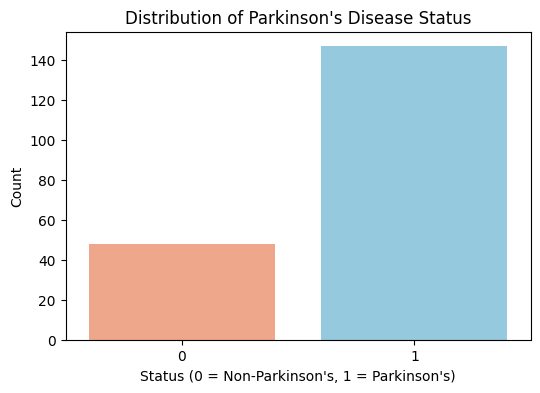

In [8]:
# Get the counts of each class in the 'status' column
status_counts = parkinson_data['status'].value_counts()

# Calculate the ratio of the first class (0) to the total number of samples
class_ratio = status_counts[0] / status_counts.sum()

# Print the class ratio
print("Parkinson's Disease Class Ratio:", class_ratio)

# Plot the distribution of Parkinson's Disease status
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=parkinson_data, palette=['#FFA07A', '#87CEEB'])
plt.title("Distribution of Parkinson's Disease Status")
plt.xlabel("Status (0 = Non-Parkinson's, 1 = Parkinson's)")
plt.ylabel("Count")
plt.show()

<Figure size 1200x1000 with 0 Axes>

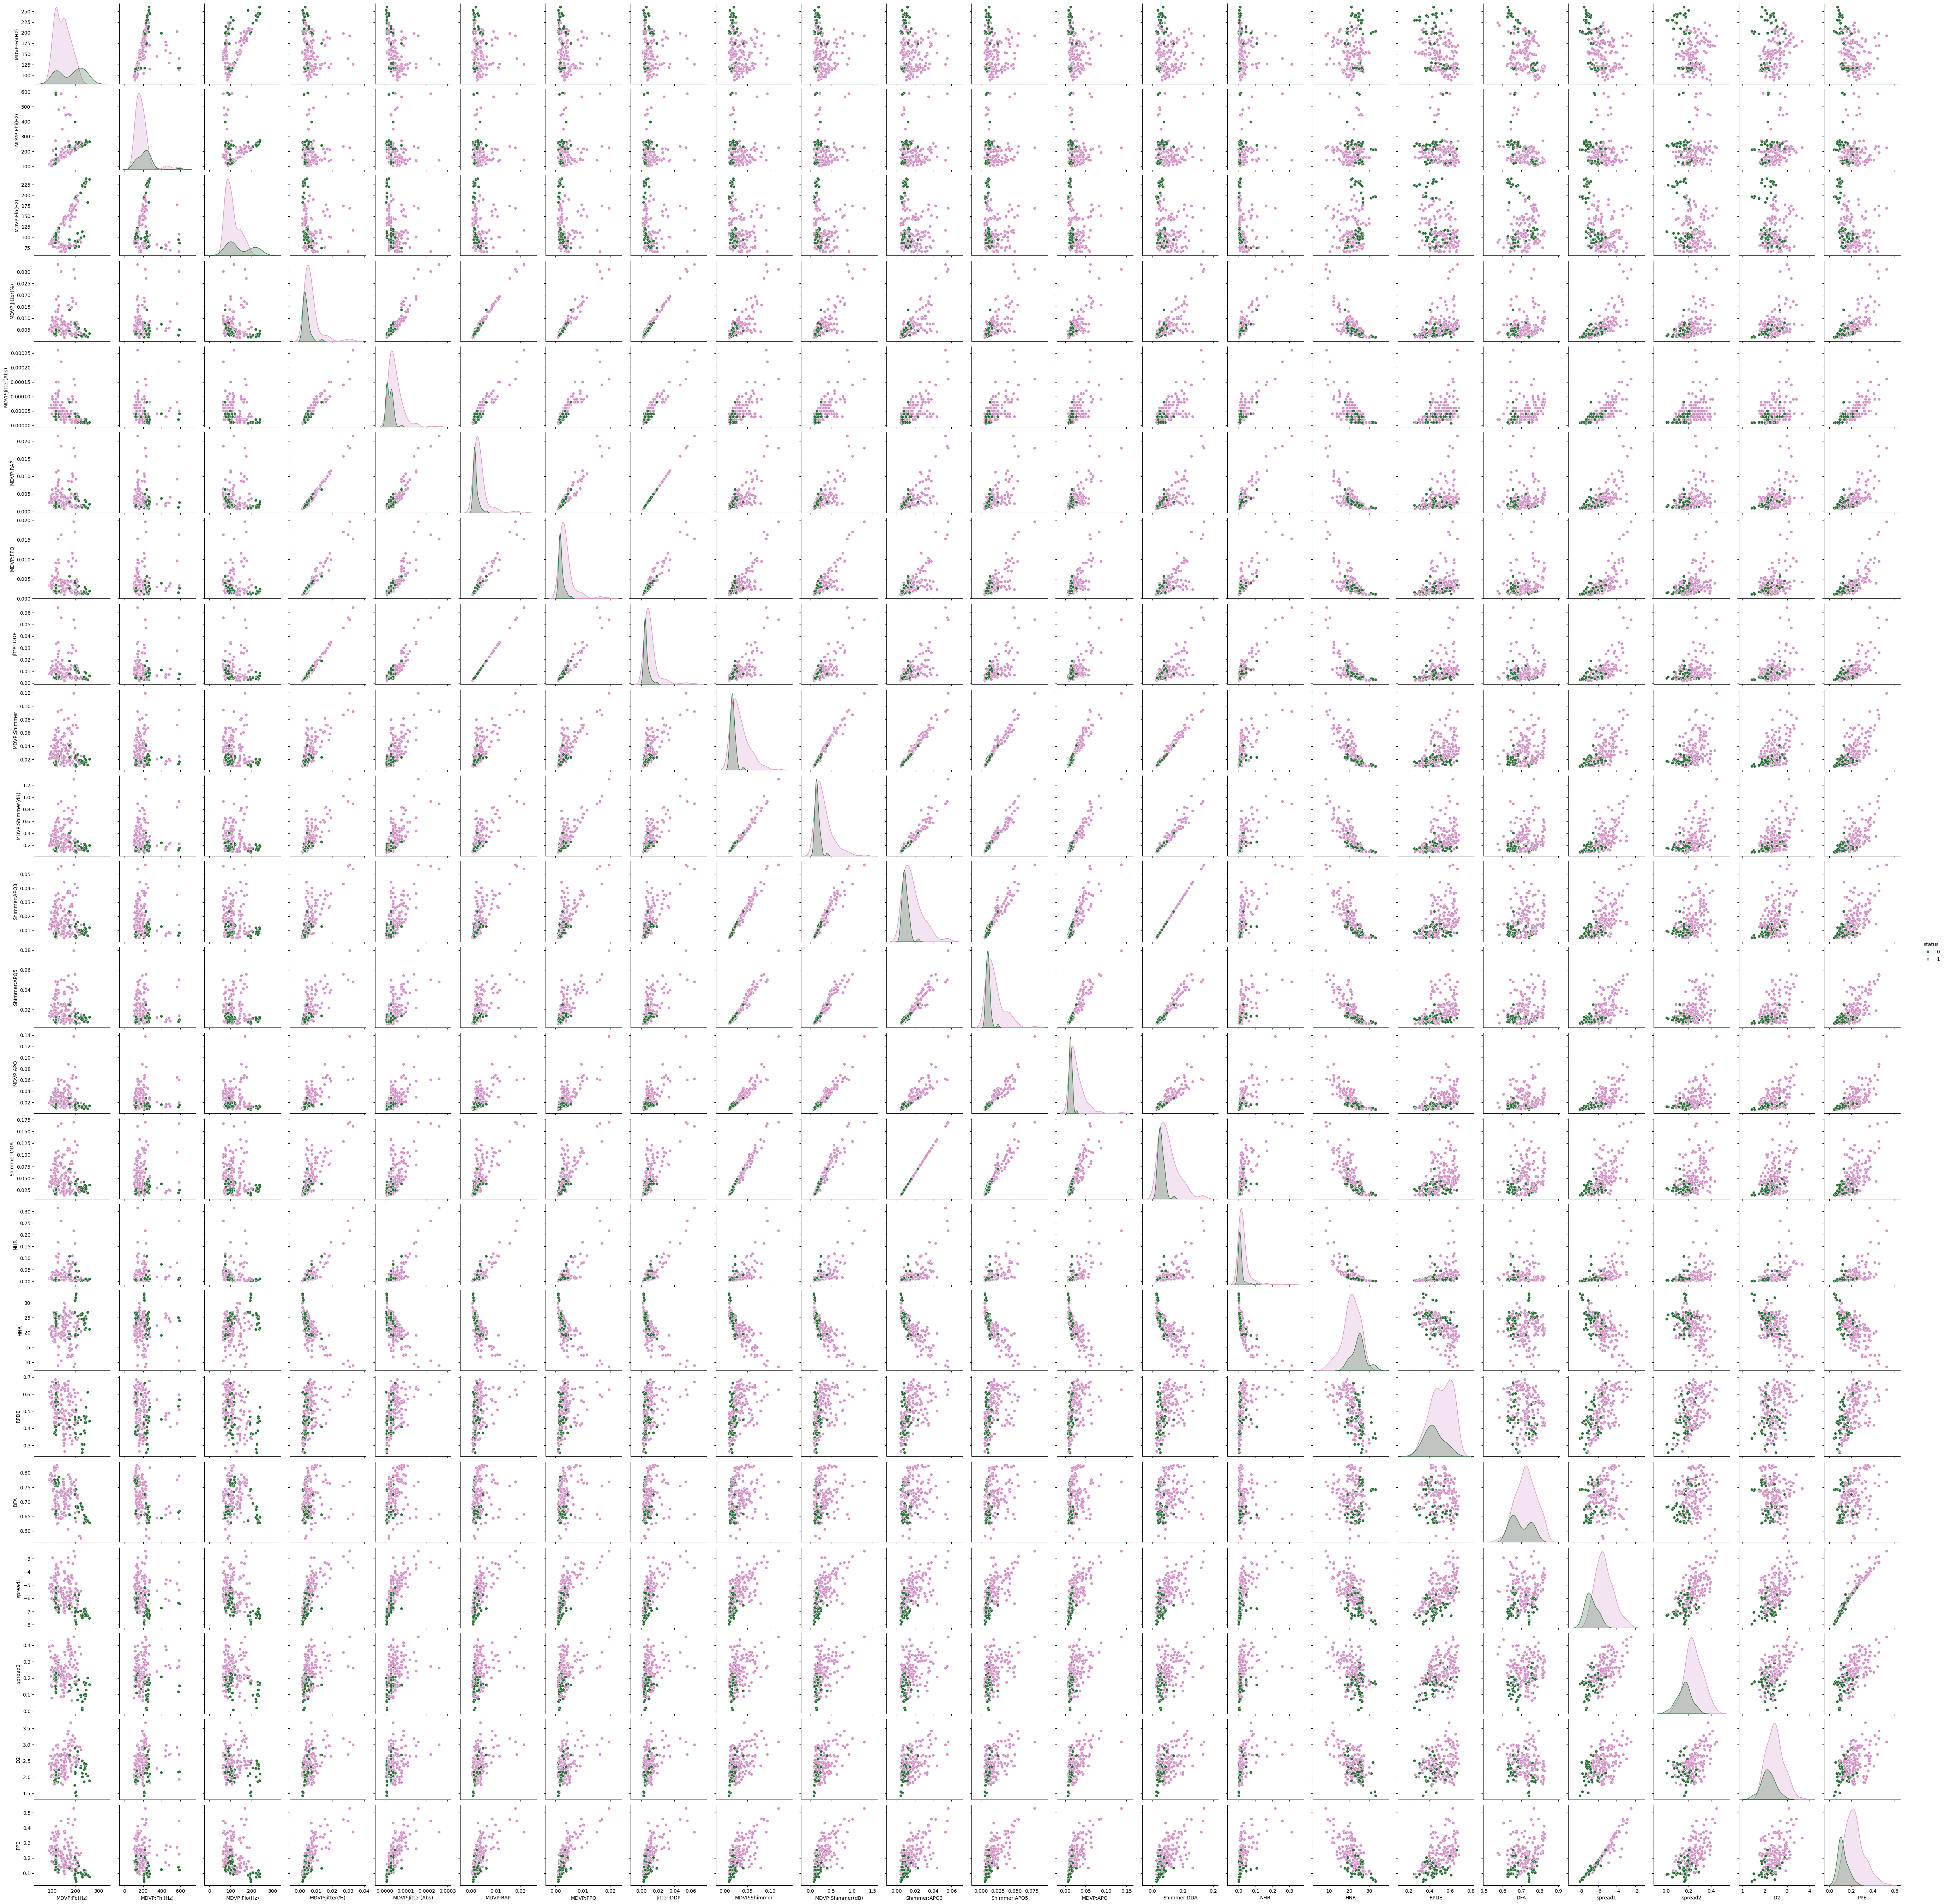

In [9]:
# Visualize the pairwise relationships between features, colored by the target variable.
plt.figure(figsize=(12, 10))
sns.pairplot(parkinson_data.drop('name', axis=1), hue='status', diag_kind='kde', palette='cubehelix')
plt.show()

## 5. Feature Selection

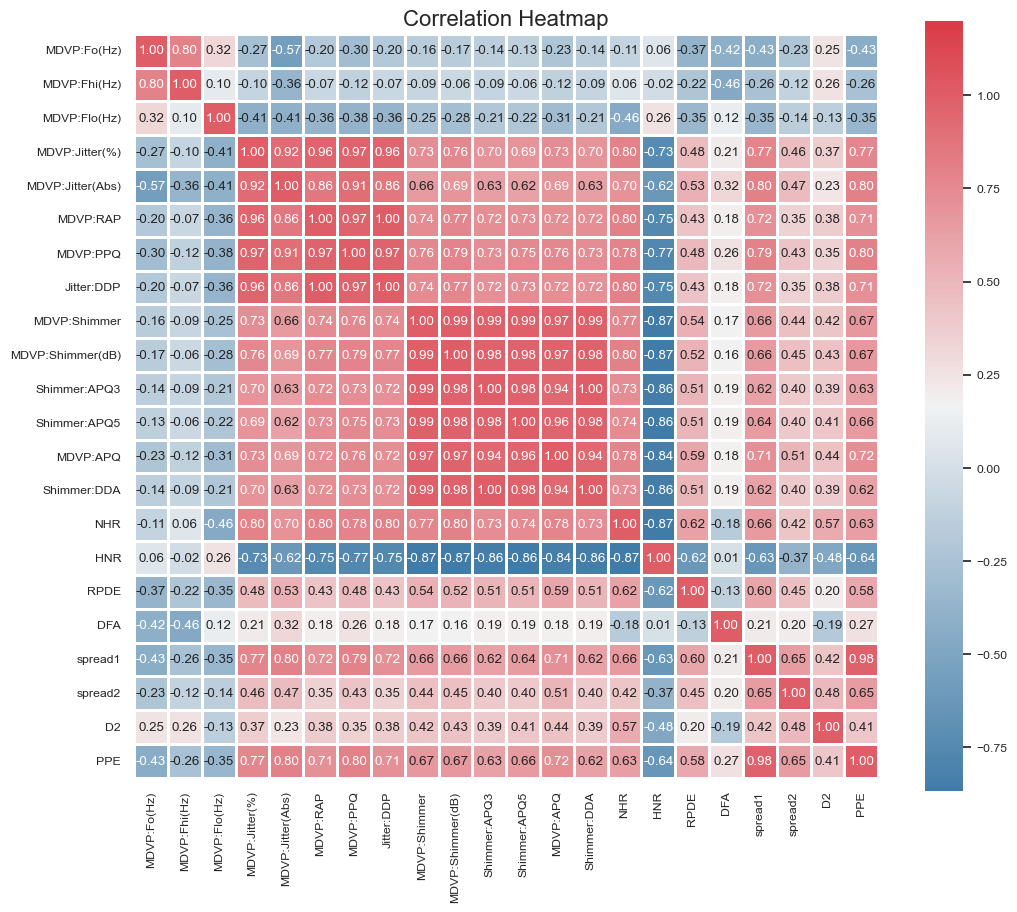

In [10]:
# Visualize the correlation between features using a heatmap.
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)
cmap = sns.diverging_palette(240, 10, as_cmap=True)
corr_matrix = parkinson_data.drop(['name', 'status'], axis=1).corr('spearman')
sns.heatmap(corr_matrix, vmax=1.2, annot=True, square=True, cmap=cmap, fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [11]:
# Function to find highly correlated features based on a given threshold (0.9).
def identify_correlated_cols(data, threshold):
    corr_cols = set()
    corr_matrix = data.corr('spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                corr_cols.add(col_name)
    return corr_cols

correlated_cols = identify_correlated_cols(parkinson_data.drop(['name', 'status'], axis=1), 0.9)
print("Highly Correlated Features:", correlated_cols)

Highly Correlated Features: {'Shimmer:DDA', 'MDVP:APQ', 'MDVP:Jitter(Abs)', 'Shimmer:APQ5', 'Shimmer:APQ3', 'MDVP:PPQ', 'MDVP:Shimmer(dB)', 'PPE', 'MDVP:RAP', 'Jitter:DDP'}


In [12]:
# Analyze the relationship between categorical and numerical features using ANOVA.
parkinson_data_anova = parkinson_data.drop(['name'], axis=1)
target_groups = pd.unique(parkinson_data_anova['status'].values)

cols_to_remove = []

for i in range(len(parkinson_data_anova.columns) - 1):
    feature_data = {grp: parkinson_data_anova[parkinson_data_anova.columns[i]][parkinson_data_anova['status'] == grp] for grp in target_groups}
    F, p = stats.f_oneway(*feature_data.values())
    print(f"P-Value of {parkinson_data_anova.columns[i]} and target: {p}") 
    if p < 0.05:
        print(f"There is a relation between {parkinson_data_anova.columns[i]} and target \n")
    else:
        print(f"There is no relation between {parkinson_data_anova.columns[i]} and target \n")
        cols_to_remove.append(parkinson_data_anova.columns[i])

P-Value of MDVP:Fo(Hz) and target: 3.121919402836281e-08
There is a relation between MDVP:Fo(Hz) and target 

P-Value of MDVP:Fhi(Hz) and target: 0.020275669142798075
There is a relation between MDVP:Fhi(Hz) and target 

P-Value of MDVP:Flo(Hz) and target: 4.1970041821534755e-08
There is a relation between MDVP:Flo(Hz) and target 

P-Value of MDVP:Jitter(%) and target: 8.209989250843791e-05
There is a relation between MDVP:Jitter(%) and target 

P-Value of MDVP:Jitter(Abs) and target: 1.2822523240682343e-06
There is a relation between MDVP:Jitter(Abs) and target 

P-Value of MDVP:RAP and target: 0.00016433934101952843
There is a relation between MDVP:RAP and target 

P-Value of MDVP:PPQ and target: 4.257766523261801e-05
There is a relation between MDVP:PPQ and target 

P-Value of Jitter:DDP and target: 0.00016454664474031017
There is a relation between Jitter:DDP and target 

P-Value of MDVP:Shimmer and target: 1.264702289675246e-07
There is a relation between MDVP:Shimmer and target 


In [13]:
# Identify and remove constant features that do not provide any useful information.
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(parkinson_data.drop('name', axis=1))

constant_cols = [col for col in parkinson_data.drop('name', axis=1).columns
                 if col not in parkinson_data.drop('name', axis=1).columns[constant_filter.get_support()]]
print(f"Constant Columns: {constant_cols}")
print(f"Number of Constant Columns: {len(constant_cols)}")

Constant Columns: []
Number of Constant Columns: 0


In [14]:
# Drop the highly correlated, insignificant, and constant features from the dataset.
cols_to_drop = list(correlated_cols) + cols_to_remove + ['name']
parkinson_data.drop(cols_to_drop, axis=1, inplace=True)
print(f"Remaining Columns: {parkinson_data.columns}")
print(f"Shape of the DataFrame: {parkinson_data.shape}")

Remaining Columns: Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2'],
      dtype='object')
Shape of the DataFrame: (195, 13)


## 6. Split the data into training and test sets, and standardize the features.

In [15]:
X = parkinson_data.drop(['status'], axis=1)
y = parkinson_data['status']

In [16]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## 7. Training XGBoost Model

In [18]:
# Train the XGBoost classifier on the training data.
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## 8. Evaluating the Model

In [19]:
# Evaluate the performance of the XGBoost model on the test data.
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places

Accuracy: 0.9153


## 9. Calculating ROC-AUC Score

In [20]:
# Calculate the Area Under the Receiver Operating Characteristic (ROC-AUC) score for the XGBoost model.
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.4f}")  # Print ROC-AUC score with 4 decimal places

ROC-AUC Score: 0.9318


## 10. Confusion Matrix

In [21]:
# Generate the confusion matrix to evaluate the model's performance in terms of true positives, true negatives, false positives, and false negatives.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11  4]
 [ 1 43]]


## 11. Save the Model

In [22]:
pickle.dump(xgb_classifier, open('xgb_parkinson_model.pkl', 'wb'))

## 12. Build a flask web app

#### Please refer to the flask_app.py file for the implementation of the Flask web application.